# Table of Contents

### 1. [Gather](#gather)

### 2. [Assess](#assess)

### 3. [Clean](#clean)
* [Quality](#quality)
* [Tidiness](#tidiness)

### 4. [Insights](#insights)

# Gather

- Twitter Archive Enhanced downloaded from Resources, saved as twitter-archive-enhanced.csv

- Image Predictions downloaded programmatically from Udacity using the Requests library, saved as image-predictions.tsv

- JSON data for every tweet in the archive downloaded programmatically using the Tweepy library and Twitter API, saved as tweet_json.txt

# Assess

- Visually

- Programmatically

- Detect and document EIGHT Quality issues and TWO tidiness issues (must satisfy the Project Motivation Key Points)

## Key Points:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

# Clean

- Clean data and place in Pandas dataframe

# Storing, Analyzing, and Visualizing Data

- Store the clean dataframes in CSV file(s), the main file named twitter_archive_master.csv

- Optionally, store the data in a SQLite database (submit if it exists)

- Analyze and Visualize data in the wrangle_act notebook

# Gather<a id='gather'></a>

In [80]:
'''Import required libraries'''

import matplotlib.pyplot as plt
import pandas as pd

In [81]:
'''Use the Requests library to download the image-predictions TSV file from Udacity. Uncomment to run'''

# import requests

# r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# print(r.status_code)

# with open('image-predictions.tsv', 'w') as outfile:
#     outfile.write(r.text)

'Use the Requests library to download the image-predictions TSV file from Udacity. Uncomment to run'

In [82]:
'''Use the Tweepy library and Twitter API to download extended data for the tweets in the archive. Uncomment to run'''

# import json
# import os
# import tweepy

# CONSUMER_KEY = os.environ.get('CONSUMER_KEY')
# CONSUMER_SECRET = os.environ.get('CONSUMER_SECRET')
# ACCESS_TOKEN = os.environ.get('ACCESS_TOKEN')
# ACCESS_SECRET = os.environ.get('ACCESS_SECRET')

# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
# tweets_ids = list(tweet_df.tweet_id)

# def get_tweets(tweet_ids):
#     '''Function to take tweet IDs in list form and create a dictionary to pass as JSON to a .txt file'''

#     nonexistent = list()
#     tweets = dict()
#     for tweet_id in tweet_ids:
#         print(tweet_id)
#         try:
#             twt = api.get_status(tweet_id, tweet_mode='extended')
#             tweets[tweet_id] = twt._json
#         except tweepy.TweepError:
#             nonexistent.append(tweet_id)
#     print(nonexistent)
#     return tweets

# t = get_tweets(tweets_ids)

# with open('tweet_json.txt', 'w') as outfile:
#     json.dump(t, outfile)

'Use the Tweepy library and Twitter API to download extended data for the tweets in the archive. Uncomment to run'

In [83]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_tweet_info = pd.read_json('tweet_json.txt', dtype={'Index': str}).T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Assess

<a id='assess'></a>

In [84]:
# df.loc[df['retweeted_status_id'].notna()].source.value_counts()
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [85]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [86]:
df_tweet_info

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2327,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2328,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2329,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [87]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2331 non-null   object
 1   id                             2331 non-null   object
 2   id_str                         2331 non-null   object
 3   full_text                      2331 non-null   object
 4   truncated                      2331 non-null   object
 5   display_text_range             2331 non-null   object
 6   entities                       2331 non-null   object
 7   extended_entities              2059 non-null   object
 8   source                         2331 non-null   object
 9   in_reply_to_status_id          77 non-null     object
 10  in_reply_to_status_id_str      77 non-null     object
 11  in_reply_to_user_id            77 non-null     object
 12  in_reply_to_user_id_str        77 non-null     object
 13  in_

In [88]:
for row in df_tweet_info.extended_entities:
    print(row)

 'url': 'https://t.co/NMQq6HIglK', 'display_url': 'pic.twitter.com/NMQq6HIglK', 'expanded_url': 'https://twitter.com/dog_rates/status/666428276349472768/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 521, 'h': 684, 'resize': 'fit'}, 'small': {'w': 518, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 521, 'h': 684, 'resize': 'fit'}}}]}
{'media': [{'id': 666421153020444674, 'id_str': '666421153020444674', 'indices': [29, 52], 'media_url': 'http://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg', 'url': 'https://t.co/YMcrXC2Y6R', 'display_url': 'pic.twitter.com/YMcrXC2Y6R', 'expanded_url': 'https://twitter.com/dog_rates/status/666421158376562688/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}
{

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [90]:
df.loc[df.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [91]:
df.retweeted_status_id.count()

181

In [92]:
df_tweet_info.loc[df_tweet_info.retweeted_status.notna()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,886053434075471873,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Sat Jun 25 01:52:36 +0000 2016,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN,NaN
1019,Fri Jun 17 16:01:16 +0000 2016,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN,NaN
1218,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN
2234,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN


In [93]:
all_columns = pd.Series(list(df) + list(df_image) + list(df_tweet_info))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

### Quality
* Some tweets in the archive are actually replies and/or retweets and duplicated data
* Different column names for the same data (tweet_id vs. id, source)
* df_tweet_info has id and str_id columns
* id columns are not the same name in each table
* The df source column is 90% the same value, and the other values are not informative or relevant (the df_tweet_info table has complete source values)
* The df_tweet_info table has a number of columns with few or no entries(geo, coordinates, place, contributors)
* Data types: retweet_count, favorite_count should be integers, not objects
* Data types: truncated, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable are type object instead of boolean
* The df_tweet_info display_text_range column is the wrong format (rename to display_text_length and convert current objects to single int values)

<a id='quality'></a>

### Tidiness

* The doggo, floofer, pupper, and puppo columns are separate, and the column names are variables
* The df_tweet_info entities and extended_entities columns cells contain multiple values
* Tweet information is spread over three datasets

<a id='tidiness'></a>

# Clean

<a id='clean'></a>

In [94]:
'''Create copies of the Dataframes for cleaning'''

clean_df = df.copy()
clean_df_image = df_image.copy()
clean_df_tweet_info = df_tweet_info.copy()

### Some tweets in the archive are actually replies and/or retweets and duplicated data

#### Define

Remove retweets (should be 2175 non-null records, removing 181 rows)

#### Code

In [95]:
clean_df = clean_df[clean_df.retweeted_status_id.isna()]
clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [96]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### df_tweet_info has id and id_str columns

#### Define

Remove id_str column, convert other to str type

#### Code


In [97]:
clean_df_tweet_info.drop('id_str', axis=1, inplace=True)
clean_df_tweet_info['id'] = df_tweet_info['id'].astype(str)

#### Test

In [98]:
print(type(clean_df_tweet_info.id[0]))
clean_df_tweet_info.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2331 non-null   object
 1   id                             2331 non-null   object
 2   full_text                      2331 non-null   object
 3   truncated                      2331 non-null   object
 4   display_text_range             2331 non-null   object
 5   entities                       2331 non-null   object
 6   extended_entities              2059 non-null   object
 7   source                         2331 non-null   object
 8   in_reply_to_status_id          77 non-null     object
 9   in_reply_to_status_id_str      77 non-null     object
 10  in_reply_to_user_id            77 non-null     object
 11  in_reply_to_user_id_str        77 non-null     object
 12  in_reply_to_screen_name        77 non-null     o

### ID columns are not the same name and type in each table

#### Define

Rename id columns in all tables to "id" and set type as str

#### Code

In [99]:
clean_df.rename(columns={'tweet_id': 'id'}, inplace=True)
clean_df.id = clean_df.id.astype(str)
clean_df_image.rename(columns={'tweet_id': 'id'}, inplace=True)
clean_df_image.id = clean_df_image.id.astype(str)
clean_df_tweet_info.id = clean_df_tweet_info.id.astype(str)

#### Test

In [100]:
clean_df.id, clean_df_image.id, clean_df_tweet_info.id

(0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2351    666049248165822465
 2352    666044226329800704
 2353    666033412701032449
 2354    666029285002620928
 2355    666020888022790149
 Name: id, Length: 2175, dtype: object,
 0       666020888022790149
 1       666029285002620928
 2       666033412701032449
 3       666044226329800704
 4       666049248165822465
                ...        
 2070    891327558926688256
 2071    891689557279858688
 2072    891815181378084864
 2073    892177421306343426
 2074    892420643555336193
 Name: id, Length: 2075, dtype: object,
 0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2326    666049248165822465
 2327    666044226329800704
 2328    666033412701032449
 2329    666029285002620928
 2330    666020888022790

### The df_tweet_info table has a number of columns with few or no entries(geo, coordinates, place, contributors) that are not necessary or relevant to this analysis and are so incomplete that they wouldn't be useful to anyone.

#### Define

Remove unnecessary columns

#### Code

In [101]:
clean_df_tweet_info.drop(['geo', 'coordinates', 'place', 'contributors'], axis=1, inplace=True)

#### Test

In [102]:
clean_df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2331 non-null   object
 1   id                             2331 non-null   object
 2   full_text                      2331 non-null   object
 3   truncated                      2331 non-null   object
 4   display_text_range             2331 non-null   object
 5   entities                       2331 non-null   object
 6   extended_entities              2059 non-null   object
 7   source                         2331 non-null   object
 8   in_reply_to_status_id          77 non-null     object
 9   in_reply_to_status_id_str      77 non-null     object
 10  in_reply_to_user_id            77 non-null     object
 11  in_reply_to_user_id_str        77 non-null     object
 12  in_reply_to_screen_name        77 non-null     object
 13  use

### Data types: clean_df_tweet_info columns retweet_count, favorite_count are object types

#### Define

Convert column types to int

#### Code

In [103]:
clean_df_tweet_info = clean_df_tweet_info.astype({'retweet_count': int, 'favorite_count': int})

#### Test

In [104]:
clean_df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2331 non-null   object
 1   id                             2331 non-null   object
 2   full_text                      2331 non-null   object
 3   truncated                      2331 non-null   object
 4   display_text_range             2331 non-null   object
 5   entities                       2331 non-null   object
 6   extended_entities              2059 non-null   object
 7   source                         2331 non-null   object
 8   in_reply_to_status_id          77 non-null     object
 9   in_reply_to_status_id_str      77 non-null     object
 10  in_reply_to_user_id            77 non-null     object
 11  in_reply_to_user_id_str        77 non-null     object
 12  in_reply_to_screen_name        77 non-null     object
 13  use

### Data types: truncated, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable contain boolean values but are of 
type object

#### Define

Convert column types to boolean

#### Code

In [105]:
clean_df_tweet_info = clean_df_tweet_info.astype({'truncated': bool, 'favorited': bool, 'retweeted': bool, 'possibly_sensitive': bool, 'possibly_sensitive_appealable': bool, 'display_text_range': str})

#### Test

In [106]:
clean_df_tweet_info.dtypes

created_at                       object
id                               object
full_text                        object
truncated                          bool
display_text_range               object
entities                         object
extended_entities                object
source                           object
in_reply_to_status_id            object
in_reply_to_status_id_str        object
in_reply_to_user_id              object
in_reply_to_user_id_str          object
in_reply_to_screen_name          object
user                             object
is_quote_status                  object
retweet_count                     int64
favorite_count                    int64
favorited                          bool
retweeted                          bool
possibly_sensitive                 bool
possibly_sensitive_appealable      bool
lang                             object
retweeted_status                 object
quoted_status_id                 object
quoted_status_id_str             object


### The df_tweet_info display_text_range values are in the format \[Start, End\] and are the wrong dtype

#### Define

Create columns text_start, text_end, and text_length; and convert dtype to int

#### Code

In [107]:
clean_df_tweet_info.display_text_range.sort_values()

1667     [0, 100]
267      [0, 100]
1494     [0, 100]
721      [0, 100]
1002     [0, 100]
          ...    
178     [28, 165]
109      [30, 60]
181      [5, 133]
332       [5, 22]
411       [7, 56]
Name: display_text_range, Length: 2331, dtype: object

In [108]:
clean_df_tweet_info.display_text_range = clean_df_tweet_info.display_text_range.astype(str)

In [109]:
temp = clean_df_tweet_info["display_text_range"].str.split(",", expand = True)
clean_df_tweet_info['text_start'] = temp[0].str.replace(r'\D', '', regex=True).astype(int)
clean_df_tweet_info['text_end'] = temp[1].str.replace(r'\D', '', regex=True).astype(int)
clean_df_tweet_info['text_length'] = clean_df_tweet_info.text_end - clean_df_tweet_info.text_start

#### Test

In [110]:
clean_df_tweet_info[['text_start', 'text_end', 'text_length']].describe()

,text_start,text_end,text_length
count,2331.000000,2331.000000,2331.000000
mean,0.152295,111.075933,110.923638
std,1.660050,27.384275,27.615247
min,0.000000,11.000000,5.000000
25%,0.000000,93.000000,93.000000
50%,0.000000,116.000000,116.000000
75%,0.000000,137.000000,137.000000
max,30.000000,165.000000,148.000000


In [111]:
clean_df_tweet_info.text_length.describe(),
check = clean_df_tweet_info.text_length.sort_values()
check

1056      5
393       5
278       6
1889     11
554      13
       ... 
1683    144
1770    145
1441    147
1514    147
1342    148
Name: text_length, Length: 2331, dtype: int64

### The doggo, floofer, pupper, and puppo columns are separate, and the column names are variables

#### Define

Concatenate the four columns to one named 'type', using the column names as the variables

#### Code

In [112]:
clean_df[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1831
                pupper  None      224
doggo  None     None    None       75
None   None     None    puppo      24
doggo  None     pupper  None       10
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [113]:
clean_df['type'] = clean_df.doggo + clean_df.floofer + clean_df.pupper + clean_df.puppo
clean_df['type'] = clean_df.type.str.replace(r'None', '', regex=True)

In [114]:
clean_df.loc[clean_df.type == 'doggopupper', 'type'] = 'pupper'
clean_df.loc[clean_df.type == 'doggopuppo', 'type'] = 'puppo'
clean_df.loc[clean_df.type == 'doggofloofer', 'type'] = 'floofer'
clean_df.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1, inplace=True)

#### Test

In [115]:
clean_df.type.value_counts(), clean_df.columns

(           1831
 pupper      234
 doggo        75
 puppo        25
 floofer      10
 Name: type, dtype: int64,
 Index(['id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
        'source', 'text', 'expanded_urls', 'rating_numerator',
        'rating_denominator', 'name', 'type'],
       dtype='object'))

### The clean_df_tweet_info entities and extended_entities columns cells contain multiple values and are duplicated in other columns

#### Define

Drop these two columns

#### Code

In [116]:
clean_df_tweet_info.drop(['entities', 'extended_entities'], inplace=True, axis=1)

#### Test

In [117]:
clean_df_tweet_info.columns

Index(['created_at', 'id', 'full_text', 'truncated', 'display_text_range',
       'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status', 'text_start', 'text_end', 'text_length'],
      dtype='object')

### Combine tables into one dataset and clean further

* Tidiness: tweet information was spread over three datasets, combine and remove duplicates

In [118]:
df_master = clean_df.merge(clean_df_tweet_info.set_index('id'), on='id', suffixes=('', '_rem'))

In [119]:
df_master = df_master.merge(clean_df_image.set_index('id'), on= 'id', suffixes=('', '_rem'))

In [120]:
'''Iteration: remove further duplicate columns'''

df_master.drop(['retweeted_status', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_screen_name', 'in_reply_to_status_id_rem', 'in_reply_to_user_id_rem', 'source_rem', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str'], axis=1, inplace=True)

In [121]:
'''Iteration: correct column data types'''
df_master.created_at = pd.to_datetime(df_master.created_at)
df_master.timestamp = pd.to_datetime(df_master.timestamp)
df_master = df_master.astype({'is_quote_status': bool})

In [122]:
'''Iteration: standardize dog type names'''
df_master.p1 = df_master.p1.str.replace('[^a-zA-Z0-9]', ' ', regex=True)
df_master.p1 = df_master.p1.str.title()
df_master.p2 = df_master.p2.str.replace('[^a-zA-Z0-9]', ' ', regex=True)
df_master.p2 = df_master.p2.str.title()
df_master.p3 = df_master.p3.str.replace('[^a-zA-Z0-9]', ' ', regex=True)
df_master.p3 = df_master.p3.str.title()

In [123]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   id                             1987 non-null   object             
 1   timestamp                      1987 non-null   datetime64[ns, UTC]
 2   source                         1987 non-null   object             
 3   text                           1987 non-null   object             
 4   expanded_urls                  1987 non-null   object             
 5   rating_numerator               1987 non-null   int64              
 6   rating_denominator             1987 non-null   int64              
 7   name                           1987 non-null   object             
 8   type                           1987 non-null   object             
 9   created_at                     1987 non-null   datetime64[ns, UTC]
 10  full_text               

In [124]:
df_master.to_csv('twitter_archive_master.csv', index=False)

# Insights and Visualizations

<a id='insights'></a>

Three insights, one visualization

In [125]:
print(' Puppers:', df_master[df_master['type'] == 'pupper']['text_length'].mean(), '\n',
'Floofers:', df_master[df_master['type'] == 'floofer']['text_length'].mean(), '\n',
'Doggos:', df_master[df_master['type'] == 'doggo']['text_length'].mean(), '\n',
'Puppos:', df_master[df_master['type'] == 'puppo']['text_length'].mean()),'\n'
print(' On average, the longest tweets are about floofers')

 Puppers: 110.31132075471699 
 Floofers: 115.5 
 Doggos: 104.04838709677419 
 Puppos: 112.34782608695652
 On average, the longest tweets are about floofers


In [126]:
faves1t = df_master[df_master['p1_dog'] == True].p1.value_counts()
faves2t = df_master[df_master['p2_dog'] == True].p2.value_counts()
faves3t = df_master[df_master['p3_dog'] == True].p3.value_counts()

In [127]:
faves1f = df_master[df_master['p1_dog'] == False].p1.value_counts()
faves2f = df_master[df_master['p2_dog'] == False].p2.value_counts()
faves3f = df_master[df_master['p3_dog'] == False].p3.value_counts()

In [128]:
dogs = pd.concat([faves1t, faves2t, faves3t], axis=1).fillna(0)
not_dogs = pd.concat([faves1f, faves2f, faves3f], axis=1).fillna(0)

In [129]:
dogs['total'] = dogs.p1 + dogs.p2 + dogs.p3
not_dogs['total'] = not_dogs.p1 + not_dogs.p2 + not_dogs.p3

In [130]:
dogs = dogs.sort_values(by='total', ascending=False)
dogs.head()

,p1,p2,p3,total
Golden Retriever,139.0,81.0,46.0,266.0
Labrador Retriever,93.0,96.0,76.0,265.0
Chihuahua,79.0,43.0,57.0,179.0
Pembroke,88.0,25.0,26.0,139.0
Cardigan,17.0,72.0,23.0,112.0


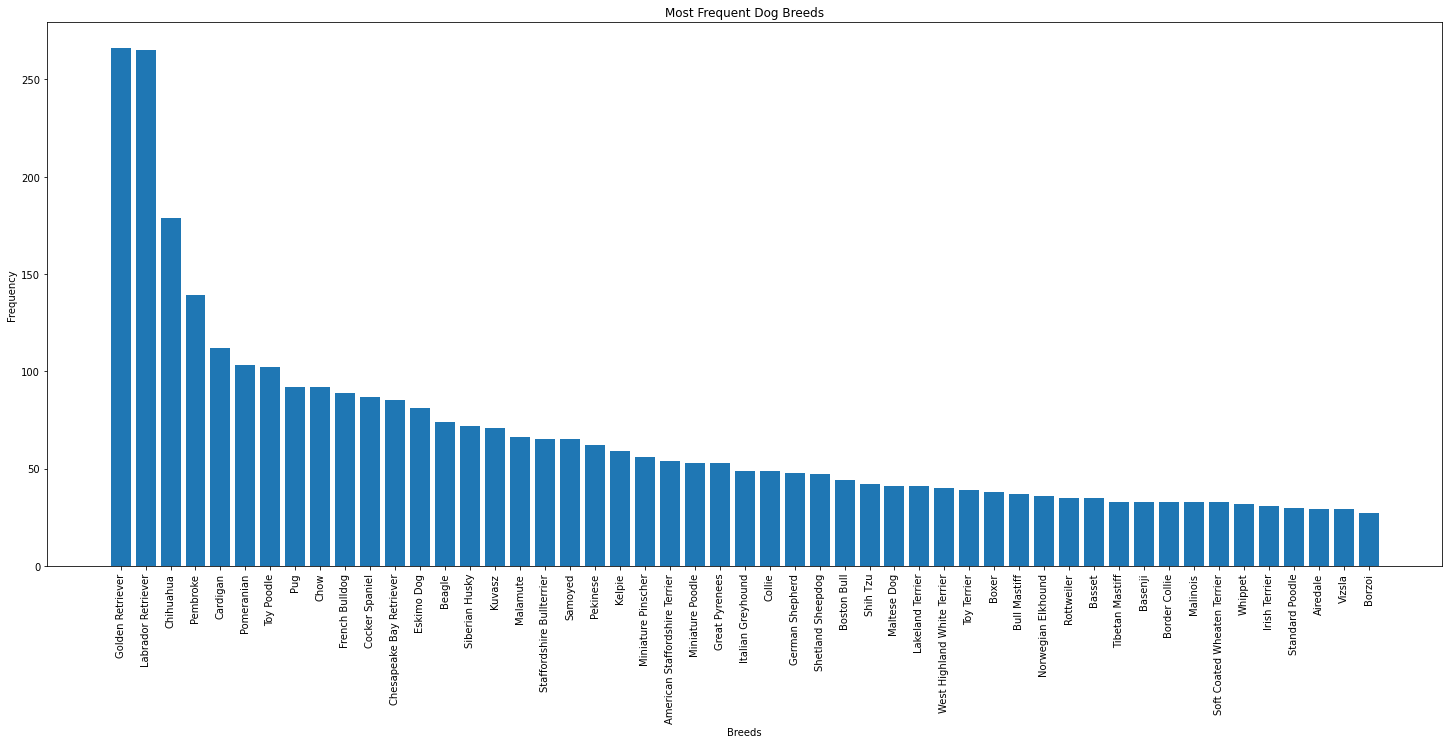

In [131]:
tot_dogs = dogs.query('total > 25')['total']
tot_dogs_index = dogs.query('total > 25').index
plt.figure(figsize=(25, 10))
plt.title('Most Frequent Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.bar(tot_dogs_index, tot_dogs);

In [132]:
not_dogs['total']

Seat Belt      45.0
Teddy          41.0
Web Site       16.0
Dingo          27.0
Tennis Ball    16.0
               ... 
Kimono          1.0
Consomme        1.0
Stinkhorn       1.0
Plunger         1.0
Pretzel         1.0
Name: total, Length: 511, dtype: float64

In [133]:
df_master.rating_numerator.sort_values()

750        0
232        0
1893       1
1969       1
1512       1
        ... 
1428     144
657      165
842      204
1711     420
720     1776
Name: rating_numerator, Length: 1987, dtype: int64

In [134]:
df_master.rating_numerator.describe()

count    1987.000000
mean       12.280825
std        41.570741
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

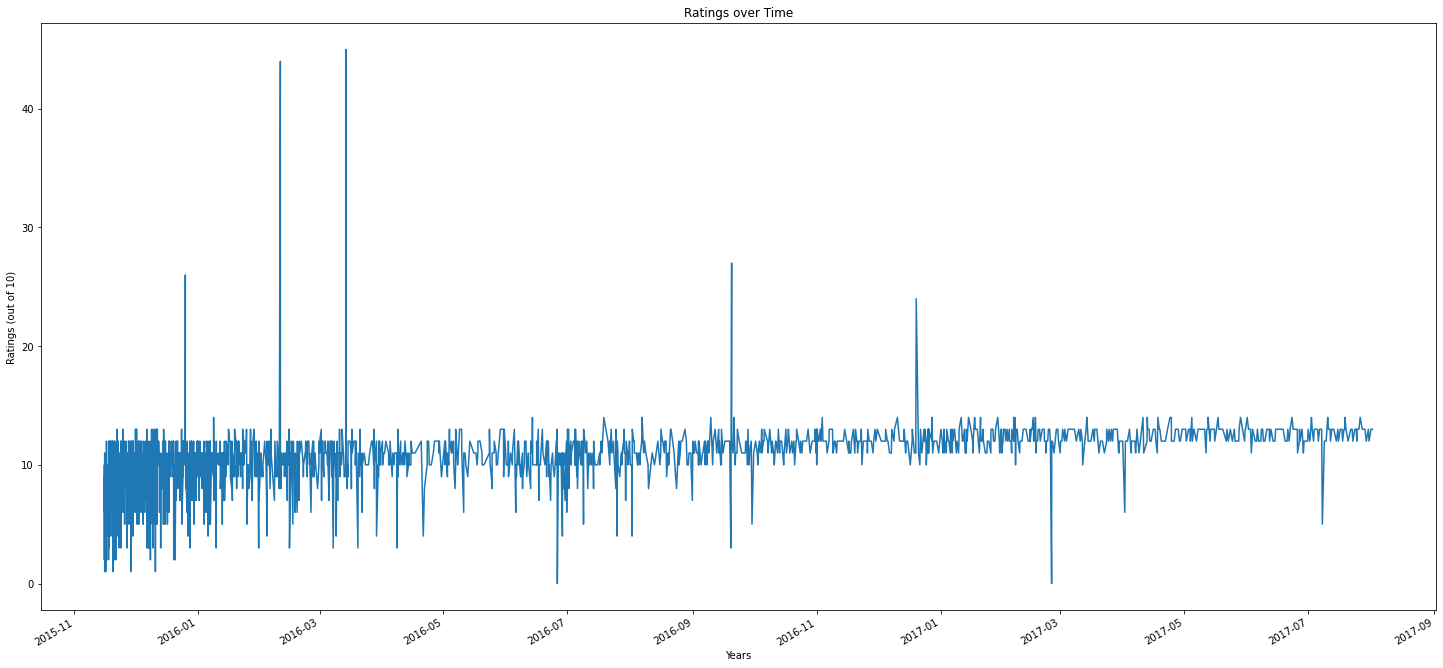

In [135]:
time = df_master.query('rating_numerator < 50')['timestamp']
ranking = df_master.query('rating_numerator < 50')['rating_numerator']
plt.figure(figsize=(25, 12))
plt.title('Ratings over Time')
plt.xlabel('Years')
plt.ylabel('Ratings (out of 10)')
plt.plot(time, ranking)
plt.gcf().autofmt_xdate()

plt.show()